
Dataset Overview:
- **Source**: Created by Paulo Cortez and Aníbal Morais from University of Minho in 2007
- **Total Instances**: 517 records
- **Purpose**: Predicting forest fire burned area using meteorological and spatial data

Columns and Their Descriptions:

Spatial Coordinates:
1. **X**: x-axis coordinate in Montesinho park map (1-9)
2. **Y**: y-axis coordinate in Montesinho park map (2-9)

Temporal Features:
3. **month**: Month of the year (jan-dec)
4. **day**: Day of the week (mon-sun)

Fire Weather Index (FWI) System Indices:
5. **FFMC** (Fine Fuel Moisture Code): 18.7 to 96.20
   - Represents the moisture content of fine surface fuels
6. **DMC** (Duff Moisture Code): 1.1 to 291.3
   - Indicates moisture content of decomposing organic material
7. **DC** (Drought Code): 7.9 to 860.6
   - Represents long-term moisture deficit in deep, compact organic layers
8. **ISI** (Initial Spread Index): 0.0 to 56.10
   - Indicates the potential speed of fire spread

Environmental Conditions:
9. **temp**: Temperature in Celsius (2.2 to 33.30)
10. **RH**: Relative Humidity in % (15.0 to 100)
11. **wind**: Wind speed in km/h (0.40 to 9.40)
12. **rain**: Outside rain in mm/m² (0.0 to 6.4)

Target Variable:
13. **area**: Burned forest area in hectares (0.00 to 1090.84)
    - **Important Note**: The area is highly skewed towards 0.0
    - Recommended to use logarithmic transformation (ln(x+1)) for modeling

Key Characteristics:
- No missing values
- Highly imbalanced target variable (most instances have very small burned areas)
- Potentially correlated features
- Suitable for:
  - Regression tasks
  - Outlier detection
  - Feature selection techniques

Modeling Recommendations:
1. Apply logarithmic transformation to the target variable
2. Consider feature selection methods
3. Use cross-validation (as in the original study: 10-fold × 30 runs)
4. Be prepared for a challenging regression task

Suggested Target Approach:
- Primary Target: **area** (burned forest area)
- Transformation: ln(area + 1) for more normalized distribution
- Prediction Goal: Estimate the extent of forest fire damage based on meteorological and spatial conditions


In [ ]:
import requests
import matplotlib.pyplot as plt
import seaborn as sns
# General libraries
import numpy as np
import pandas as pd


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from sklearn.ensemble import RandomForestRegressor


In [ ]:
  # shared link
shared_link = 'https://drive.google.com/file/d/1-j7thNXxdbISatdVzCi50KKquLTi0t_j/view?usp=sharing'

# Extract the file ID from the shared link
file_id = shared_link.split('/')[-2]
download_link = f'https://drive.google.com/uc?export=download&id={file_id}'

# Download the data set
response = requests.get(download_link)

# Save the Data temporarily (you can delete it later)
with open('Forest Fires.csv', 'wb') as f:
    f.write(response.content)
data=pd.read_csv('Forest Fires.csv')
data.head(20)


,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0
5,8,6,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.0
6,8,6,aug,mon,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.0
7,8,6,aug,mon,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0.0
8,8,6,sep,tue,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,0.0
9,7,5,sep,sat,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,0.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [ ]:

categorical_cols = data.select_dtypes(include=['object']).columns.tolist()

# Numerical columns
numerical_cols = data.select_dtypes(include=['number']).columns.tolist()

print("Categorical Columns:", categorical_cols)
print("Numerical Columns:", numerical_cols)

Categorical Columns: ['month', 'day']
Numerical Columns: ['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area']


In [ ]:
data.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [ ]:
data.describe(include=['object'])

,month,day
count,517,517
unique,12,7
top,aug,sun
freq,184,95


In [ ]:

# Check for duplicate rows
duplicate_rows = data[data.duplicated()]

if not duplicate_rows.empty:
    print("Duplicate rows found:")
    print(duplicate_rows)
else:
    print("No duplicate rows found.")


Duplicate rows found:
     X  Y month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain   area
53   4  3   aug  wed  92.1  111.2  654.1   9.6  20.4  42   4.9   0.0   0.00
100  3  4   aug  sun  91.4  142.4  601.4  10.6  19.8  39   5.4   0.0   0.00
215  4  4   mar  sat  91.7   35.8   80.8   7.8  17.0  27   4.9   0.0  28.66
303  3  6   jun  fri  91.1   94.1  232.1   7.1  19.2  38   4.5   0.0   0.00


In [ ]:
# Drop duplicate rows
data = data.drop_duplicates()

# Verify if duplicates have been removed
duplicate_rows = data[data.duplicated()]

if not duplicate_rows.empty:
    print("Duplicate rows still found:")
    print(duplicate_rows)
else:
    print("All duplicate rows removed successfully.")

All duplicate rows removed successfully.



Examine data distributions.


Check for skewness in the target variable (area).


Transform the area column using ln(area+1) for normalization.

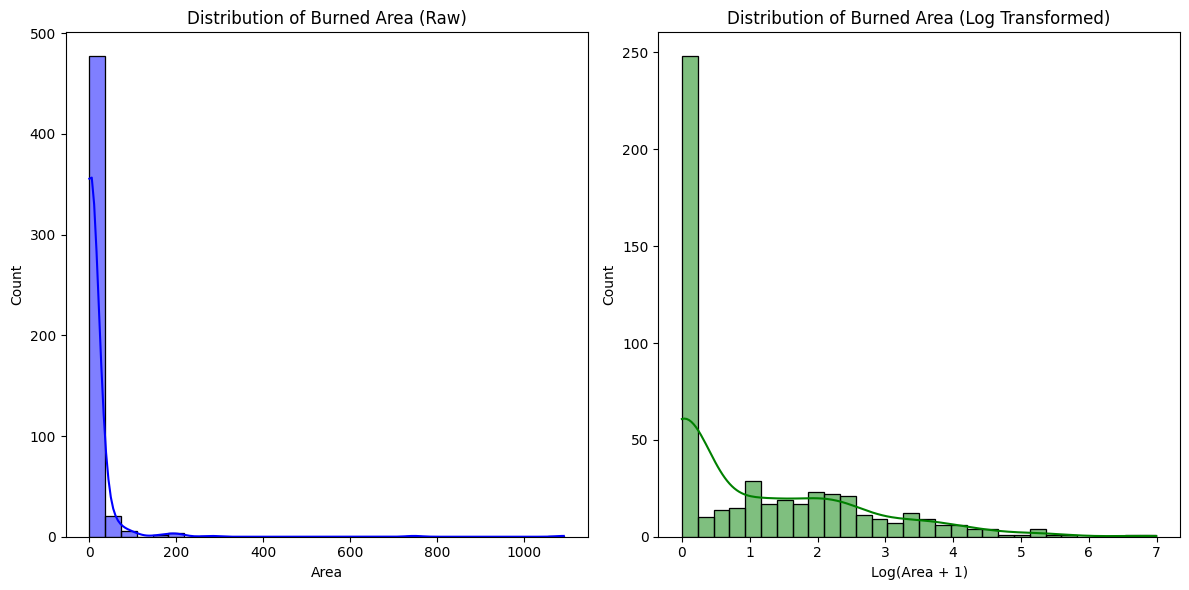

In [ ]:


# Check the distribution of the target variable 'area'
plt.figure(figsize=(12, 6))

# Raw distribution of 'area'
plt.subplot(1, 2, 1)
sns.histplot(data['area'], bins=30, kde=True, color='blue')
plt.title('Distribution of Burned Area (Raw)')
plt.xlabel('Area')

# Log-transformed distribution of 'area'
data['log_area'] = np.log1p(data['area'])
plt.subplot(1, 2, 2)
sns.histplot(data['log_area'], bins=30, kde=True, color='green')
plt.title('Distribution of Burned Area (Log Transformed)')
plt.xlabel('Log(Area + 1)')

plt.tight_layout()
plt.show()


Encode categorical variables (month, day).

In [ ]:
# Create mappings for 'month' and 'day'
month_mapping = {
    'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6,
    'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12
}

day_mapping = {
    'mon': 1, 'tue': 2, 'wed': 3, 'thu': 4, 'fri': 5, 'sat': 6, 'sun': 7
}

# Apply the mappings to the DataFrame
data['month'] = data['month'].map(month_mapping)
data['day'] = data['day'].map(day_mapping)

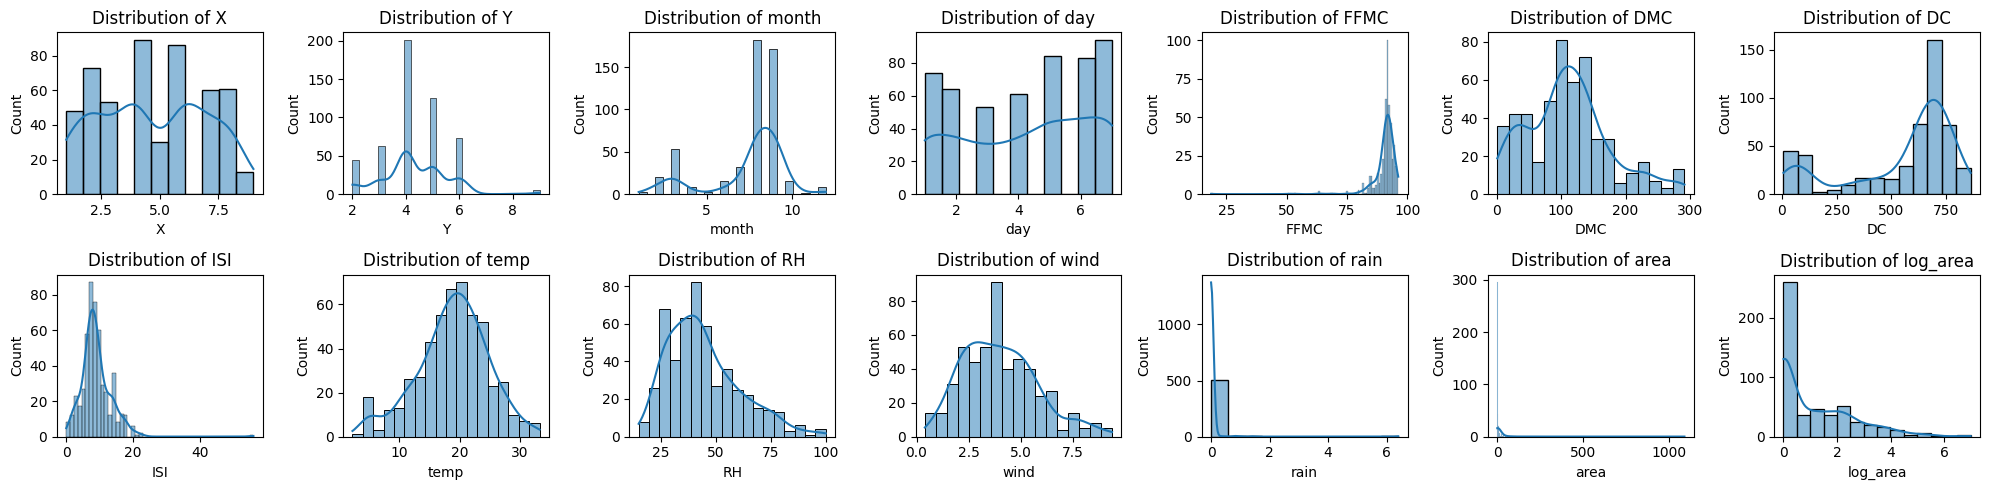

In [ ]:
# Plotting distributions for all numerical columns
plt.figure(figsize=(20, 5))  # Adjust figure size for better visualization

for i, col in enumerate(data):
    plt.subplot(2, 7, i + 1)  # Create subplots for each column
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

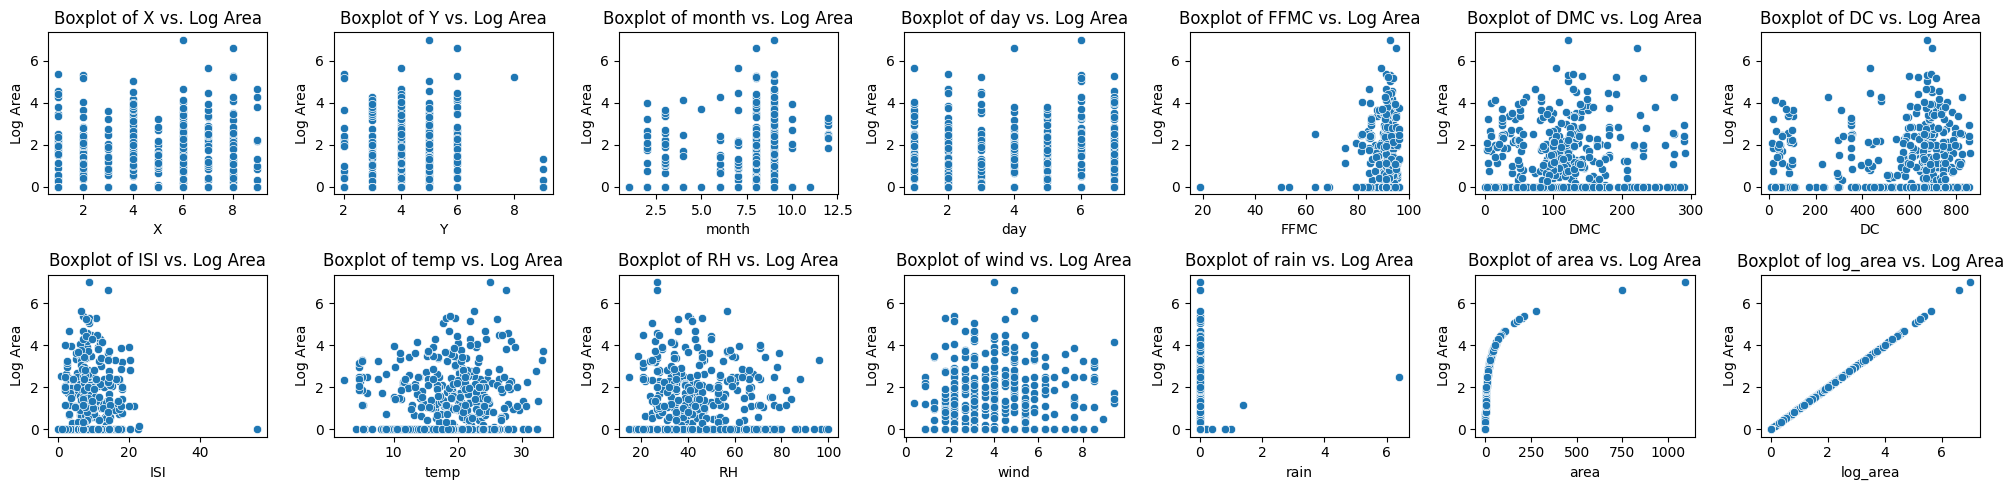

In [ ]:
# Plotting boxplots for all numerical columns against log-transformed area
plt.figure(figsize=(20, 5))  # Adjust figure size as needed

for i, col in enumerate(data):
    plt.subplot(2, 7, i + 1)  # Create subplots
    sns.scatterplot(x=col, y='log_area', data=data)
    plt.title(f'Boxplot of {col} vs. Log Area')
    plt.xlabel(col)
    plt.ylabel('Log Area')

plt.tight_layout()
plt.show()

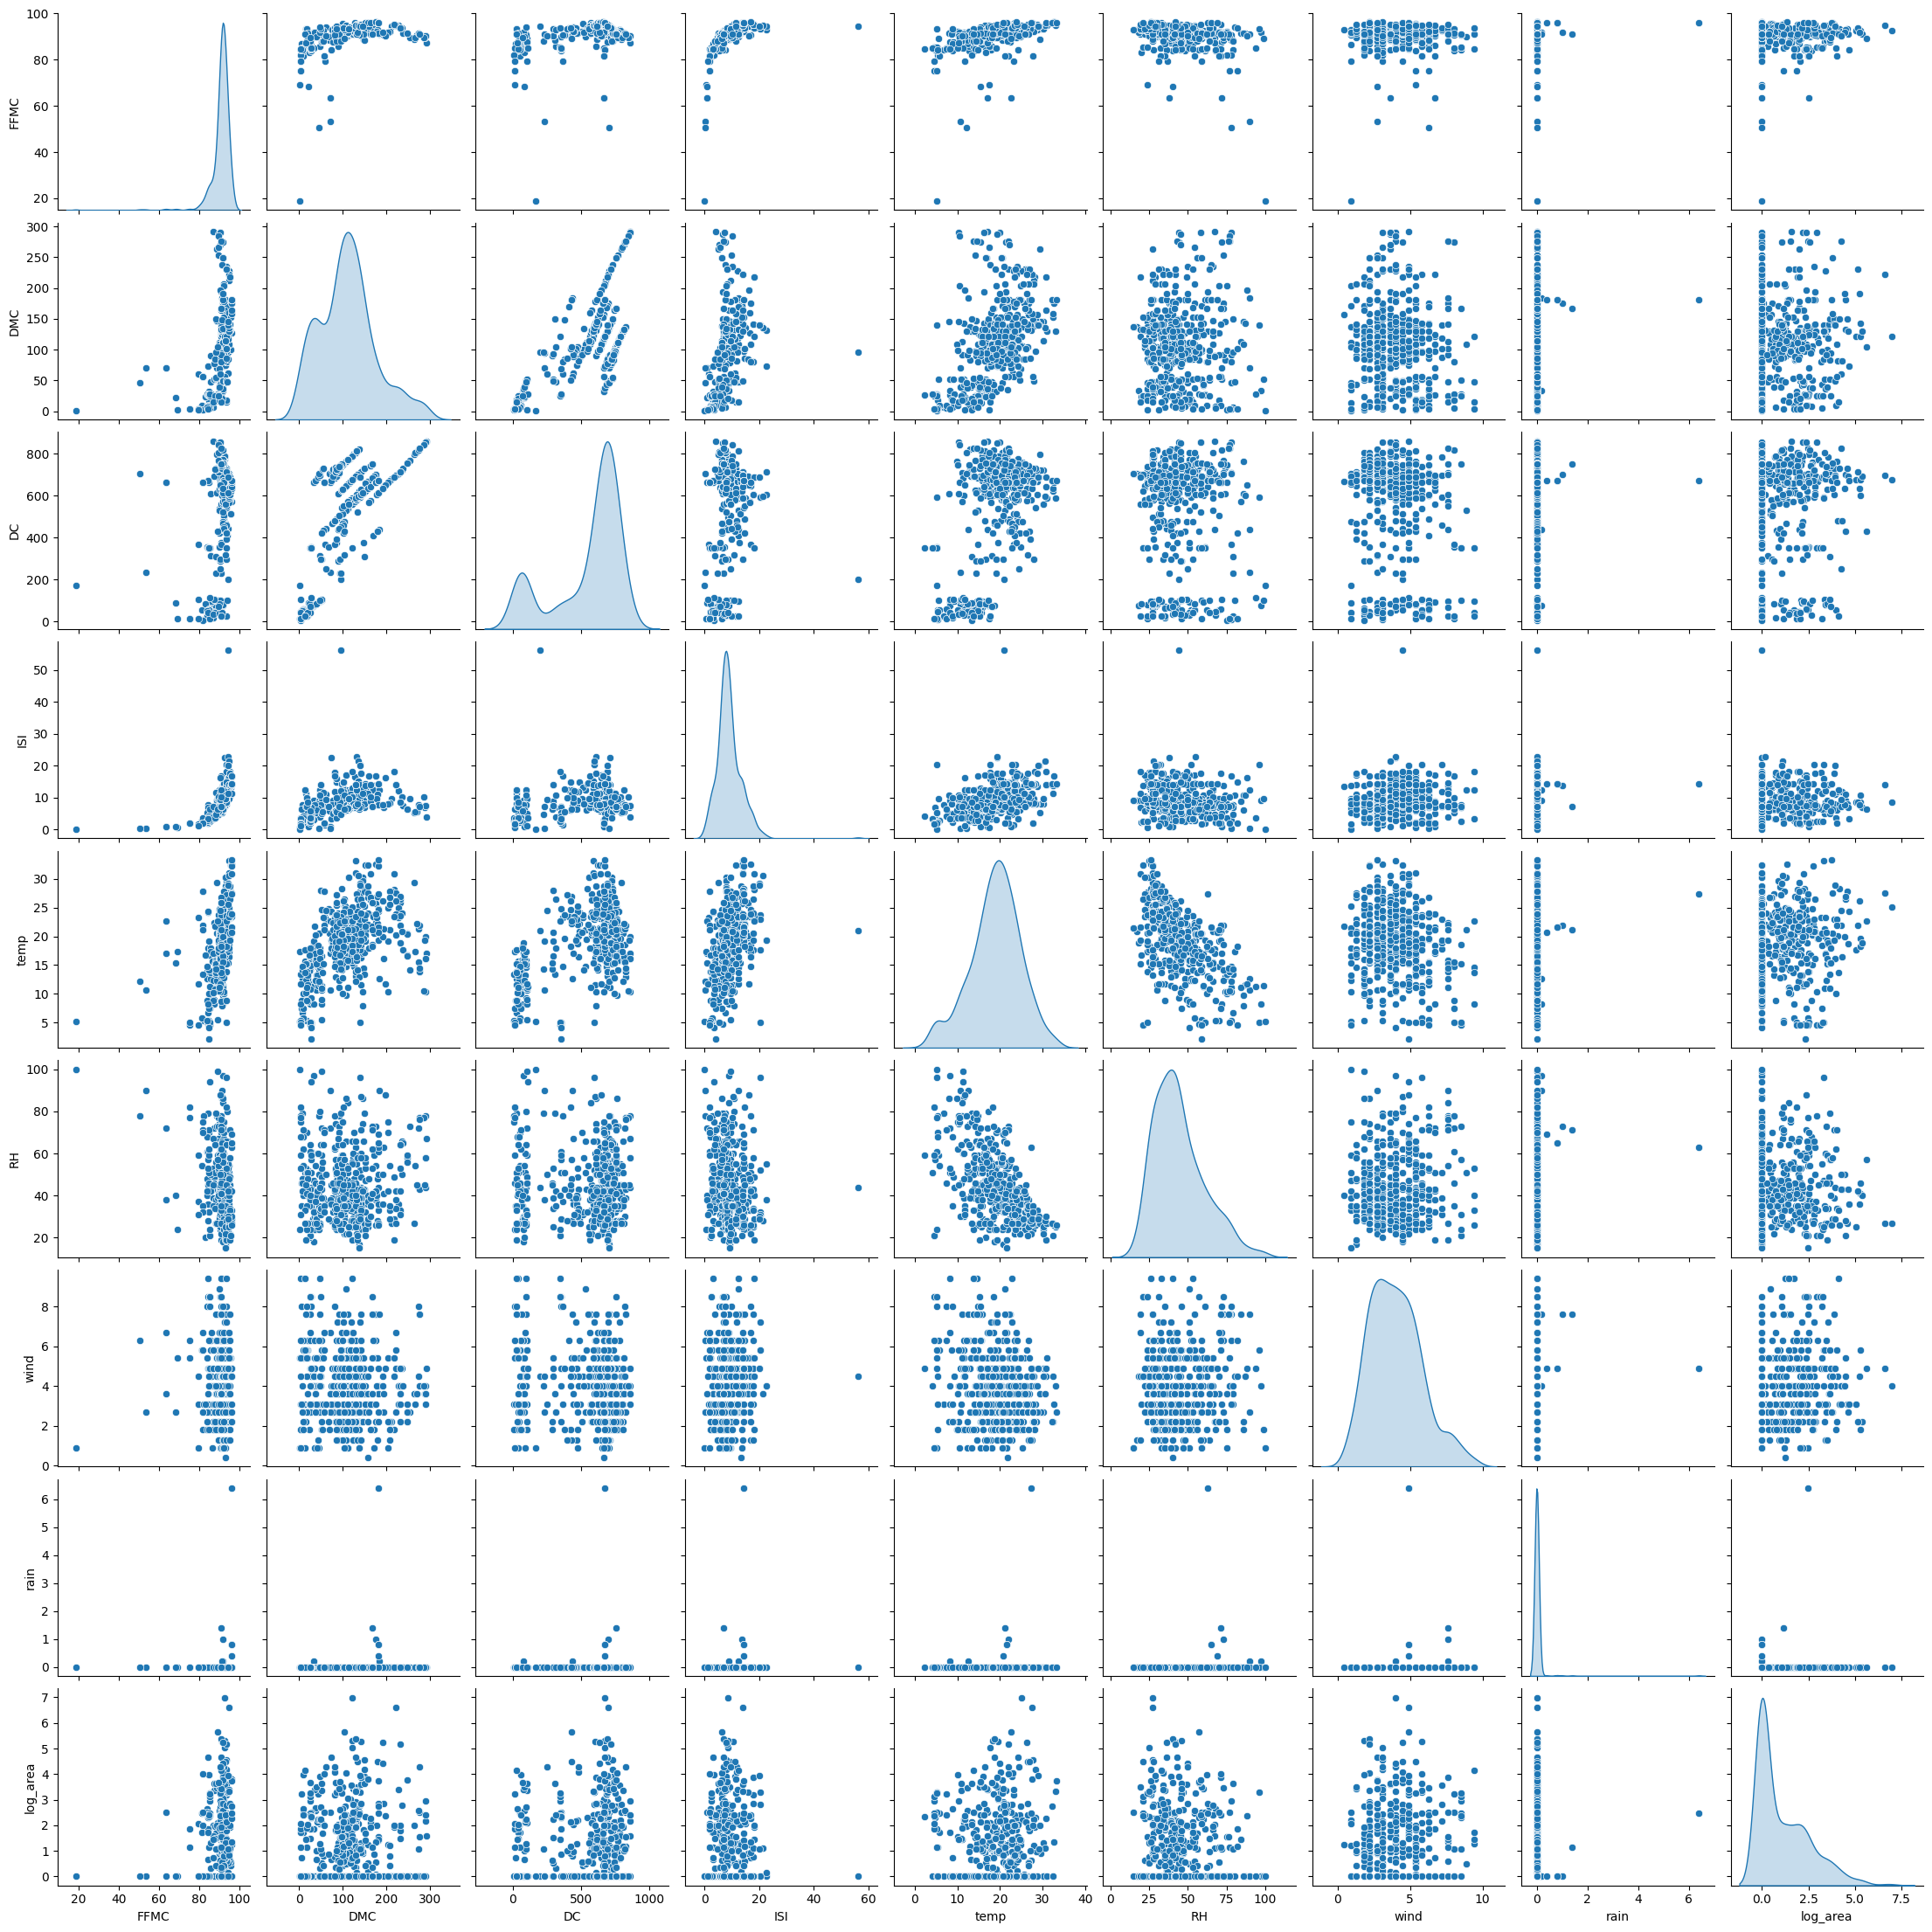

In [ ]:
# Pair plot of selected features
sns.pairplot(data[['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'log_area']], diag_kind='kde')
plt.show()

Text(0.5, 1.0, 'Correlation Heatmap')

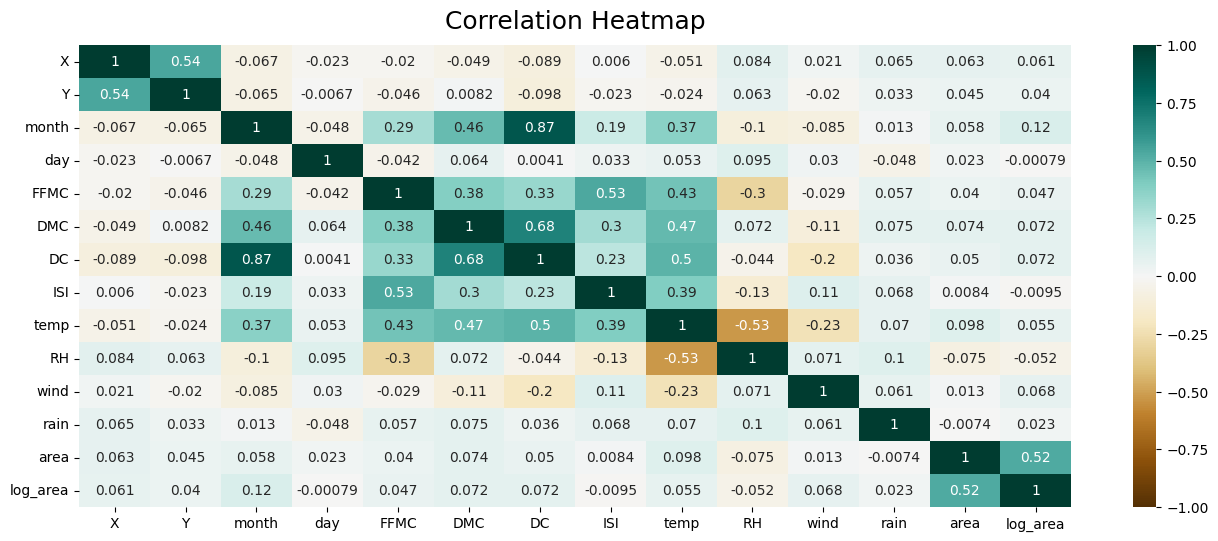

In [ ]:
# Calculate the correlation matrix for numerical features including log_area
correlation_matrix = data.corr()

# Visualize the correlation matrix
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(correlation_matrix , vmin = -1, vmax = 1, annot = True, cmap = 'BrBG')
heatmap.set_title('Correlation Heatmap', fontdict = {'fontsize': 18}, pad = 12)



The correlation matrix highlights key relationships among the features:

1. **Significant Correlations**:
   - `FFMC`, `DMC`, and `ISI` are moderately correlated with each other, indicating a possible relationship in the Fire Weather Index system.
   - `temp` and `RH` show an inverse relationship, which aligns with meteorological expectations.
   - `log_area` shows weak to moderate correlations with features such as `ISI`, `temp`, and `wind`.

2. **Categorical Features**:
   - Month and day variables, encoded as dummy variables, show little correlation with `log_area`, but some might still hold predictive value.


<ipython-input-15-65367220e88d>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='damage_category', y=feature, data=data, palette='viridis')
<ipython-input-15-65367220e88d>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='damage_category', y=feature, data=data, palette='viridis')
<ipython-input-15-65367220e88d>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='damage_category', y=feature, data=data, palette='viridis')


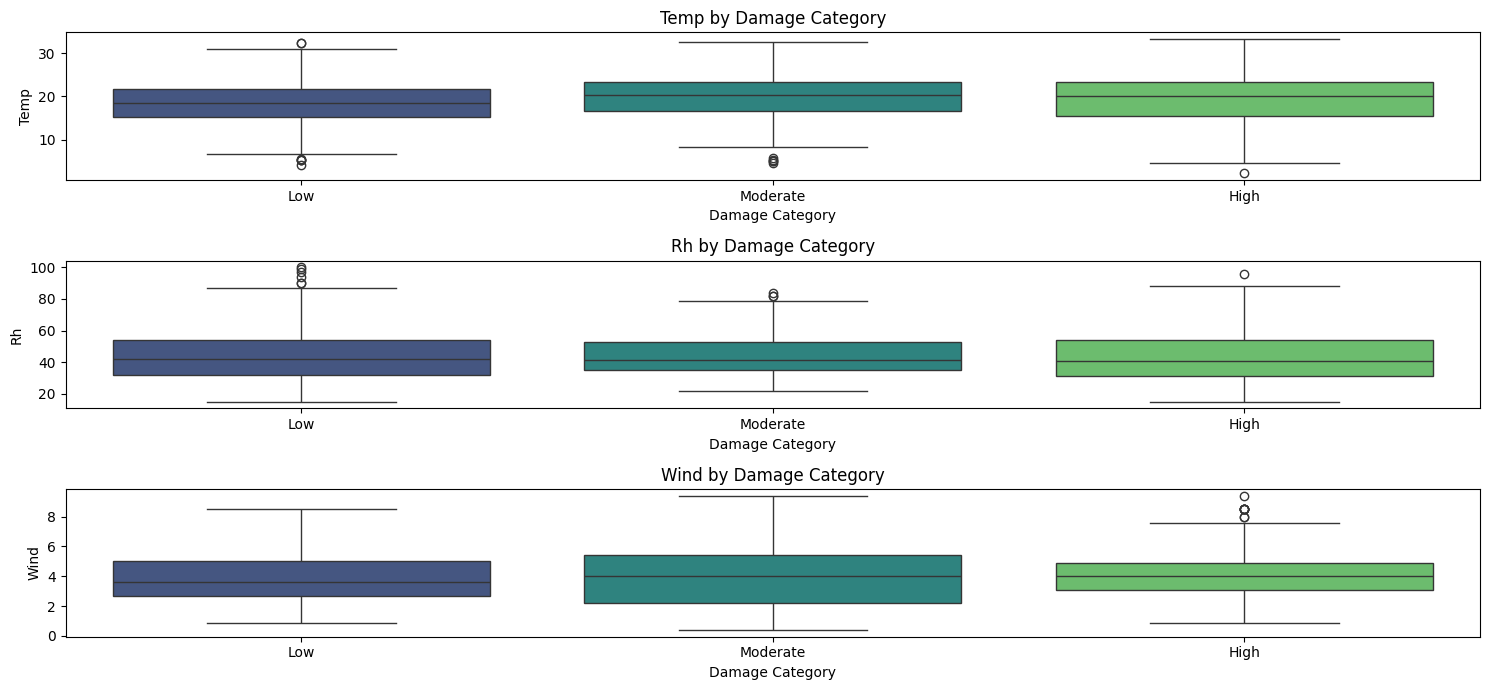

In [ ]:
# Define damage categories based on burned area (log_area)
def categorize_damage(log_area):
    if log_area <= 0:  # Adjust threshold as needed
        return "Low"
    elif 0 < log_area <= 2:  # Adjust threshold as needed
        return "Moderate"
    else:
        return "High"

# Apply the function to create a new 'damage_category' column
data['damage_category'] = data['log_area'].apply(categorize_damage)

# List of features to analyze
features = ['temp', 'RH', 'wind']
# Plotting the distribution of features across damage categories
plt.figure(figsize=(15, 7))

for i, feature in enumerate(features, 1):
    plt.subplot(3, 1, i)
    sns.boxplot(x='damage_category', y=feature, data=data, palette='viridis')
    plt.title(f'{feature.capitalize()} by Damage Category')
    plt.xlabel('Damage Category')
    plt.ylabel(feature.capitalize())

plt.tight_layout()
plt.show()


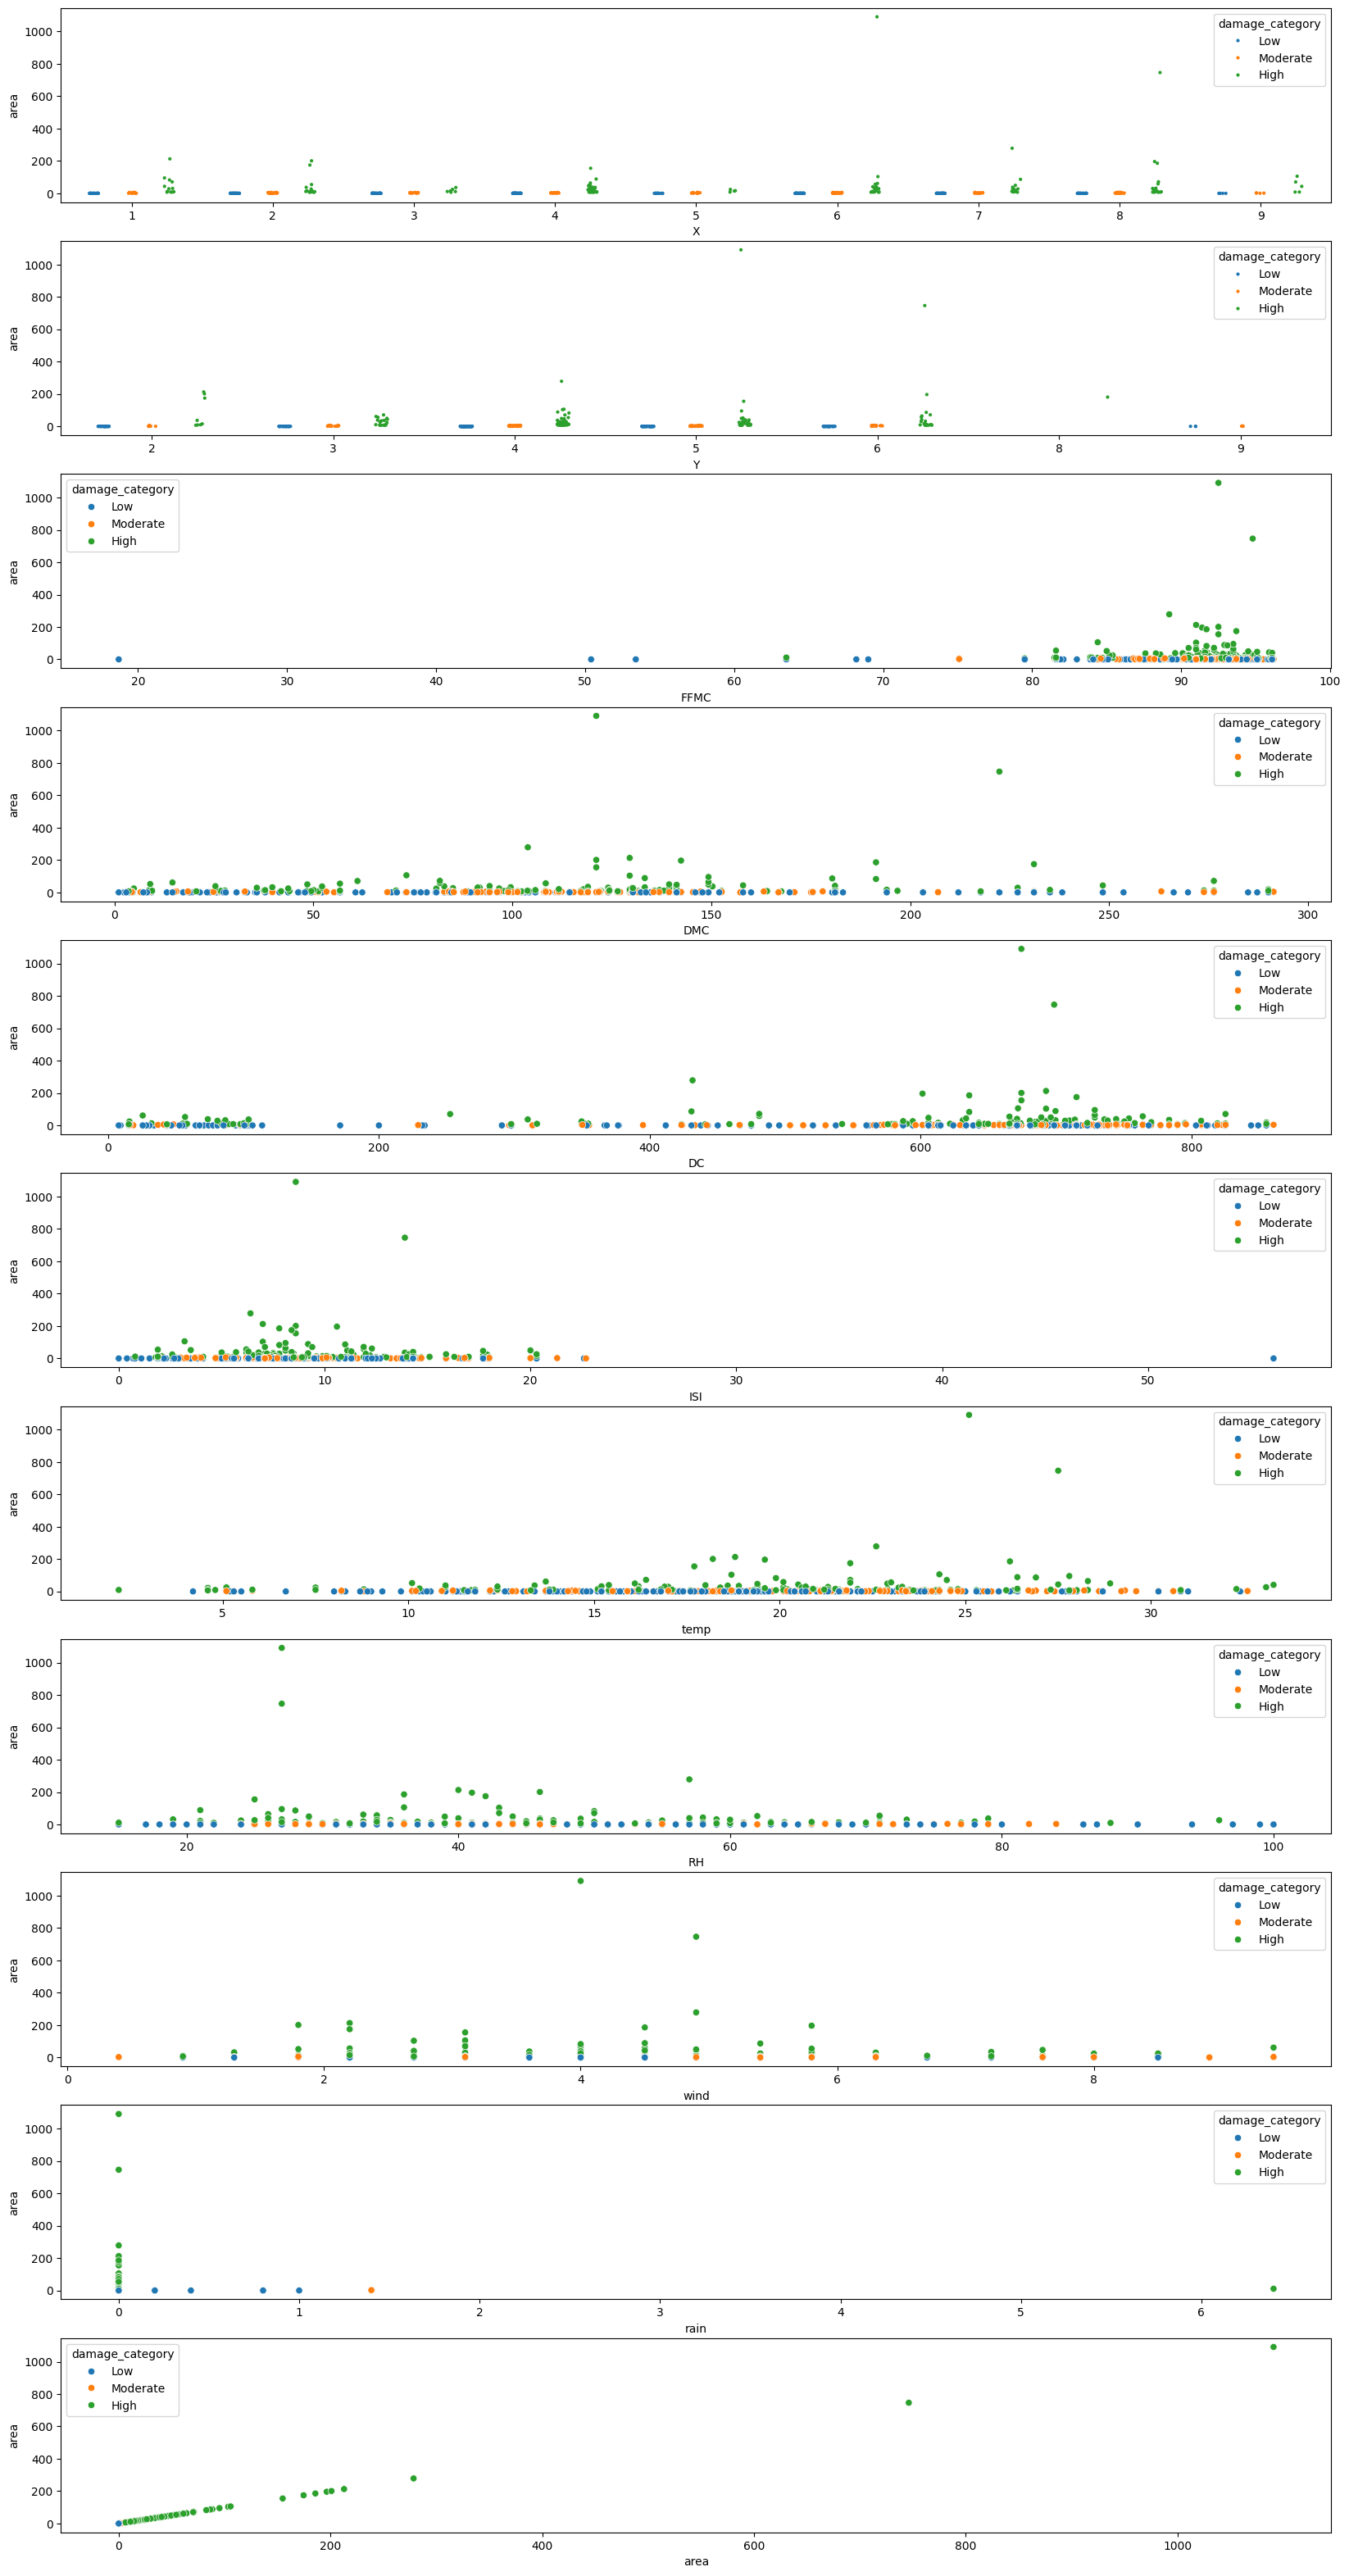

In [ ]:
# numerical columns
plt.figure(figsize=(20, 40))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(len(numerical_cols), 1, i)
    if col in ['X', 'Y']:
        # Switch to stripplot to handle overlapping points better
        sns.stripplot(data=data, x=col, y='area', hue='damage_category', dodge=True, size=3)
    else:
        sns.scatterplot(data=data, x=col, y='area', hue='damage_category')
plt.show()

<Figure size 1200x600 with 0 Axes>

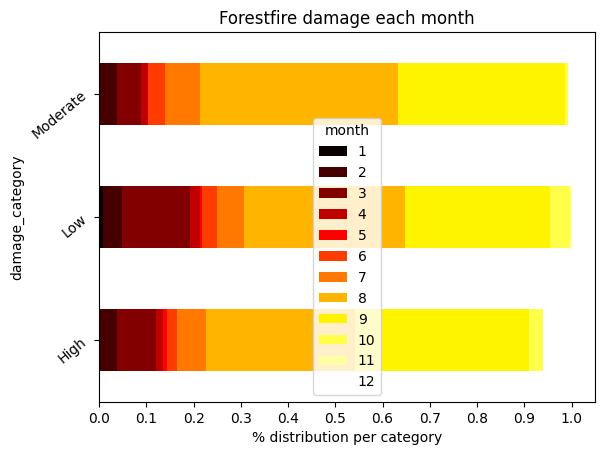

<Figure size 1200x600 with 0 Axes>

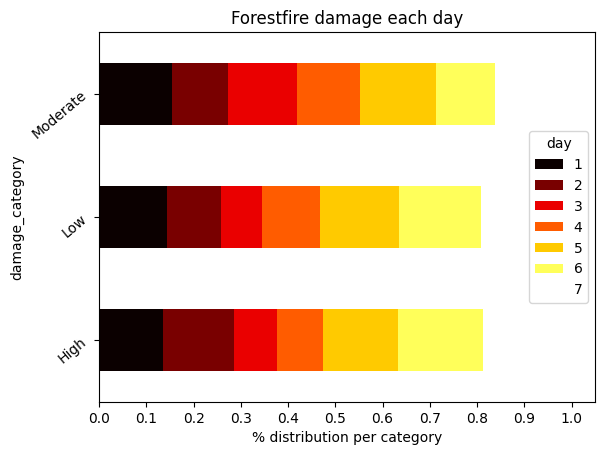

In [ ]:
for col in categorical_cols:
    plt.figure(figsize=(12, 6)) # Increased figure size
    cross = pd.crosstab(index = data['damage_category'], columns = data[col], normalize = 'index')
    cross.plot.barh(stacked = True,rot = 40,cmap = 'hot')
    plt.xlabel('% distribution per category')
    plt.xticks(np.arange(0, 1.1, 0.1))
    plt.title("Forestfire damage each {}".format(col))
    plt.show()

Feature Scaling

In [ ]:
data.describe()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,log_area
count,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000
mean,4.678363,4.300195,7.485380,4.251462,90.637427,110.989279,549.155166,9.023587,18.887524,44.348928,4.010526,0.021832,12.891598,1.113081
std,2.320059,1.230925,2.275095,2.075038,5.540920,64.191013,247.724594,4.575543,5.828128,16.358803,1.796613,0.297107,63.892586,1.397685
min,1.000000,2.000000,1.000000,1.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000
25%,3.000000,4.000000,7.000000,2.000000,90.200000,68.600000,440.900000,6.400000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000
50%,4.000000,4.000000,8.000000,5.000000,91.600000,108.300000,664.500000,8.400000,19.300000,42.000000,4.000000,0.000000,0.540000,0.431782
75%,7.000000,5.000000,9.000000,6.000000,92.900000,142.400000,713.900000,11.000000,22.800000,53.000000,4.900000,0.000000,6.570000,2.024193
max,9.000000,9.000000,12.000000,7.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,6.995620


In [ ]:


from imblearn.over_sampling import SMOTE


# Assuming 'log_area' values below 0 are considered 'minority':
minority_indices = data[data['log_area'] >0].index

# Upsample the minority instances by a factor of 2 (adjust as needed)
upsampled_indices = np.random.choice(minority_indices, size=len(minority_indices) * 4, replace=True)

# Concatenate the original data with the upsampled minority instances
data_oversampled = pd.concat([data, data.loc[upsampled_indices]])

# Proceed with your train-test split and model training using data_oversampled

X = data_oversampled.drop(['area', 'log_area','damage_category'], axis=1)  # Features
y = data_oversampled['log_area']  # Target variable




In [ ]:
data_oversampled.shape


(1589, 15)

In [ ]:
y.describe()

,log_area
count,1589.000000
mean,1.803160
std,1.364013
min,0.000000
25%,0.783902
50%,1.690096
75%,2.504709
max,6.995620


In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()

# Fit and transform the training data
X_train= scaler.fit_transform(X_train)

# Transform the testing data using the same scaler
X_test= scaler.transform(X_test)


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=5,
    verbose=2,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print(best_params)

# Create a new RandomForestRegressor model using the best hyperparameters
best_model = RandomForestRegressor(random_state=42, **best_params)

# Fit (train) the model on the training data
best_model.fit(X_train, y_train)

# Make predictions on the test data using the tuned model
y_pred = best_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)


print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")
print(f"Mean Absolute Error (MAE): {mae}")



Fitting 5 folds for each of 81 candidates, totalling 405 fits
{'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Mean Squared Error (MSE): 0.5831595699625567
R-squared (R2): 0.693021239028063
Mean Absolute Error (MAE): 0.38129793416721847


In [ ]:

# Use SelectFromModel to select features
from sklearn.feature_selection import SelectFromModel
select_from_model = SelectFromModel(best_model, threshold='median') # You can adjust the threshold
X_train_selected = select_from_model.fit_transform(X_train, y_train)
X_test_selected = select_from_model.transform(X_test)


# Print the selected feature indices
selected_feature_indices = select_from_model.get_support(indices=True)
print("Selected Feature Indices:", selected_feature_indices)

# Get the names of selected features
selected_feature_names = X.columns[selected_feature_indices]
print("Selected Feature Names:", selected_feature_names)


Selected Feature Indices: [ 5  6  7  8  9 10]
Selected Feature Names: Index(['DMC', 'DC', 'ISI', 'temp', 'RH', 'wind'], dtype='object')


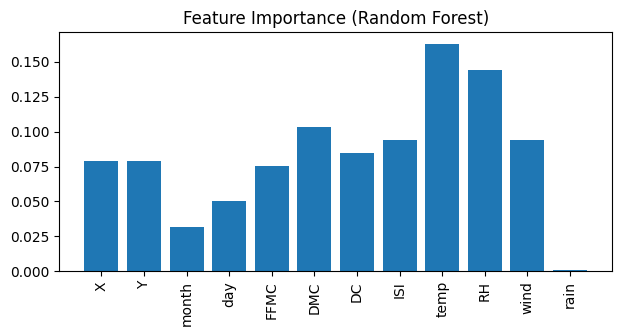

In [ ]:


models = {
    'Random Forest': best_model,
}

plt.figure(figsize=(12, 6))

for i, (name, model) in enumerate(models.items()):
    try:
        importances = model.feature_importances_
        plt.subplot(2, 2, i + 1)
        plt.title(f"Feature Importance ({name})")
        plt.bar(X.columns, importances)
        plt.xticks(rotation=90)
        plt.tight_layout()
    except AttributeError:  # Handle models without feature_importances_ (e.g., SVR)
        plt.subplot(2, 2, i + 1)
        plt.title(f"Feature Importance ({name}) - Not Available")
        plt.text(0.5, 0.5, "Not applicable for this model", ha='center', va='center')
plt.show()

In [ ]:

import os
import joblib
from sklearn.feature_selection import SelectFromModel

# Create the 'models' directory if it doesn't exist
if not os.path.exists('models'):
    os.makedirs('models')

# Save the trained model to the 'models' directory
model_filename = 'models/random_forest_model.pkl'
joblib.dump(best_model, model_filename)



# Load the saved model
loaded_model = joblib.load(model_filename)

# Example new data (replace with your actual new data)
new_data = pd.DataFrame({
    'X': [7], 'Y': [5], 'month': [8], 'day': [1], 'FFMC': [86.2], 'DMC': [26.2], 'DC': [94.3],
    'ISI': [5.1], 'temp': [8.2], 'RH': [51], 'wind': [6.7], 'rain': [0]
})

# Scale the new data using the same scaler used for training
new_data_scaled = scaler.transform(new_data)

# Make predictions on the new data
new_predictions = loaded_model.predict(new_data_scaled)

print("Predictions on new data:", new_predictions)

Predictions on new data: [1.18591224]
